# Student Depression Analysis

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
url = 'https://raw.githubusercontent.com/realvuk/Student-Depression-Analysis/refs/heads/main/Student%20Depression%20Dataset.csv'
df = pd.read_csv(url)

In [3]:
# Display dataset info
def dataset_overview(data):
    print(f"Shape: {data.shape}")
    print(f"Head:\n{data.head()}\n")
    print(f"Missing values:\n{data.isnull().sum()}")
    print(f"Statistics:\n{data.describe()}\n")
dataset_overview(df)

Shape: (27901, 18)
Head:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy  

In [4]:
# Data preprocessing
def preprocess_data(df):
    df.replace({'Gender': {'Male': 1, 'Female': 2}}, inplace=True)
    df['Dietary Habits'] = df['Dietary Habits'].replace({'Healthy': 1, 'Moderate': 2, 'Unhealthy': 3, 'Others': 4})
    df['Sleep Duration'] = df['Sleep Duration'].replace({'5-6 hours': 1, 'Less than 5 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 5})
    df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'Yes': 0, 'No': 1})
    df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'Yes': 0, 'No': 1})
    return df

df = preprocess_data(df)

<ipython-input-4-184970246906>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender': {'Male': 1, 'Female': 2}}, inplace=True)
<ipython-input-4-184970246906>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dietary Habits'] = df['Dietary Habits'].replace({'Healthy': 1, 'Moderate': 2, 'Unhealthy': 3, 'Others': 4})
<ipython-input-4-184970246906>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objec

In [5]:
# Feature Selection
columns_to_use = [
    'Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Have you ever had suicidal thoughts ?',
    'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness',
    'Depression']

df = df[columns_to_use]

In [6]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df.drop(columns=['Depression']))
y = df['Depression']

In [7]:
df.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,0.0,8.97,2.0,0.0,1,1,0,3.0,1.0,1,1
1,2,24.0,2.0,0.0,5.90,5.0,0.0,1,2,1,3.0,2.0,0,0
2,1,31.0,3.0,0.0,7.03,5.0,0.0,2,1,1,9.0,1.0,0,0
3,2,28.0,3.0,0.0,5.59,2.0,0.0,3,2,0,4.0,5.0,0,1
4,2,25.0,4.0,0.0,8.13,3.0,0.0,1,2,0,1.0,1.0,1,0


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [9]:
# Train XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [10]:
# Model evaluation
y_pred = xgb_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8292420713133847

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



In [11]:
# Feature importance
feature_importance = xgb_model.feature_importances_
features = df.drop(columns=['Depression']).columns
sorted_importance = sorted(zip(features, feature_importance), key=lambda x: x[1], reverse=True)
print("\nFeature Importance (Sorted):")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importance (Sorted):
Have you ever had suicidal thoughts ?: 0.6922
Academic Pressure: 0.1108
Financial Stress: 0.0546
Dietary Habits: 0.0294
Age: 0.0210
Study Satisfaction: 0.0193
Work/Study Hours: 0.0186
Sleep Duration: 0.0150
Family History of Mental Illness: 0.0143
CGPA: 0.0125
Gender: 0.0123
Work Pressure: 0.0000
Job Satisfaction: 0.0000


<Figure size 1000x600 with 0 Axes>

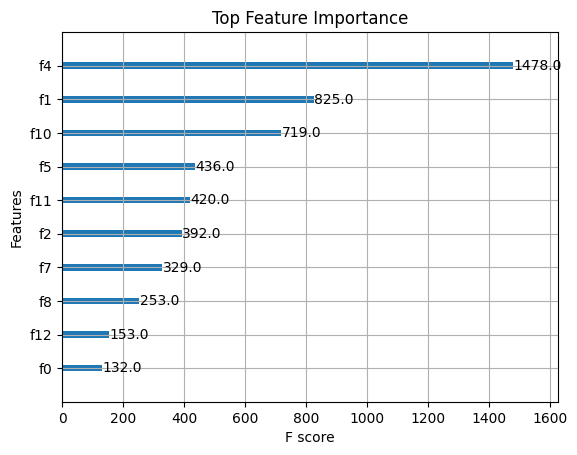

In [12]:
# Visualization of feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top Feature Importance")
plt.show()

In [17]:
# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.15, 1.17, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

keys, values = zip(*param_grid.items())

best_model = None
best_score = 0
best_params = None
for combination in itertools.product(*values):
    params = dict(zip(keys, combination))
    model = XGBClassifier(random_state=42, **params)
    model.fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test))

    if score > best_score:
        best_score = score
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.9, 'colsample_bytree': 0.9}
Best Accuracy: 0.8423221644866511


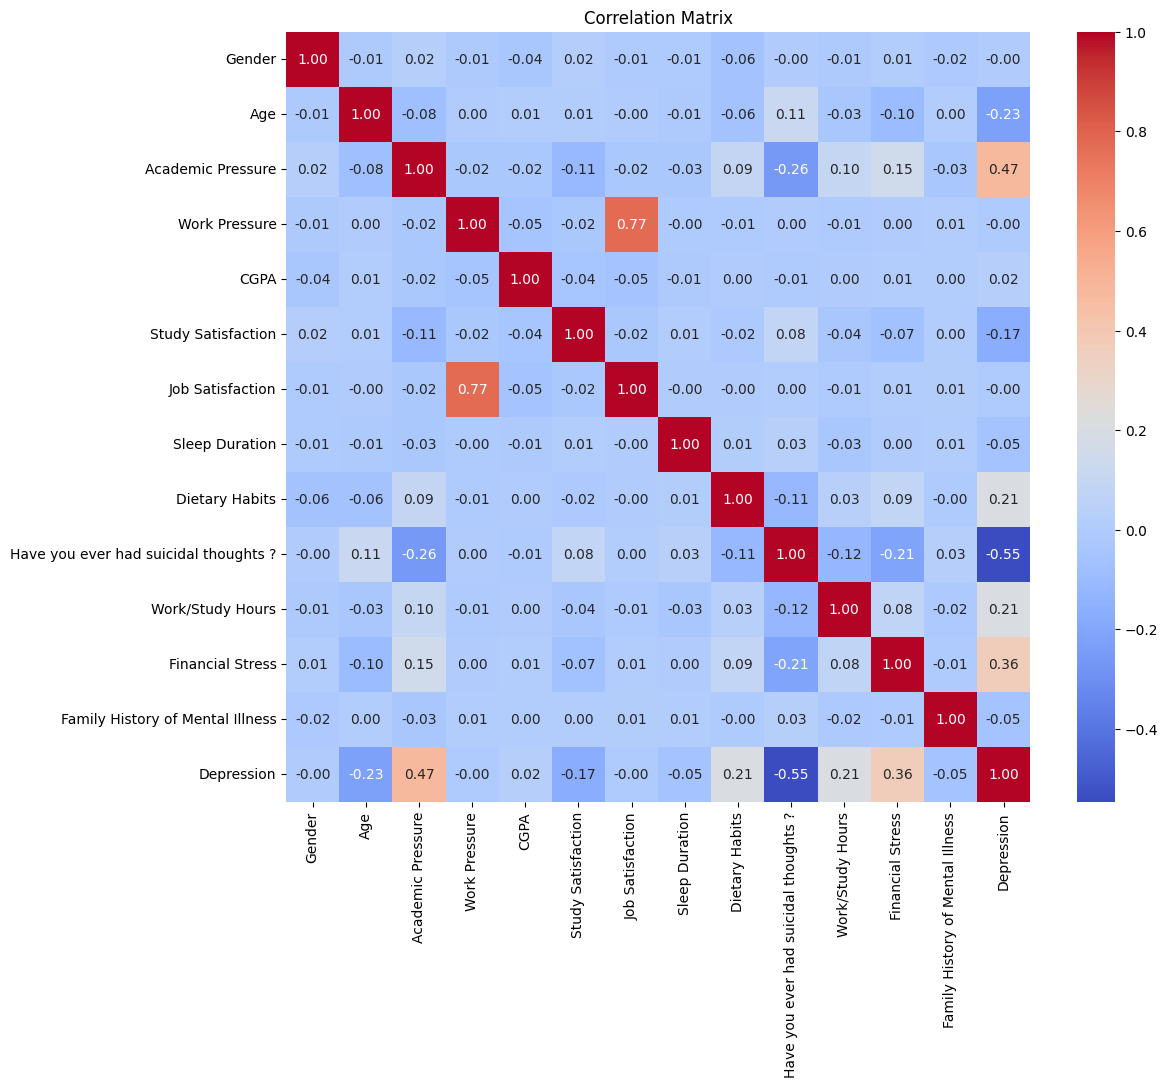

In [18]:
# Correlation matrix
def plot_correlation_matrix(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

plot_correlation_matrix(df)